In [260]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from analysis.plot_matplotlib import plot_hist
from analysis.mc import BinnedImportanceSamplingIntegrator
from analysis import tnp, tnp_mode
import pandas as pd

tnp_mode(1);

# N-dimensional Gaussian

In [39]:
from typing import Optional

def create_peaks(min, max, n_dims:int, n_peaks:Optional[int]=None):
    if n_peaks is None:
        n_peaks = n_dims
    
    peak_locs = ((min+tnp.arange(n_peaks)*(max-min)/(n_peaks-1)) * tnp.ones((1, n_dims)).T).T
    return peak_locs

peaks = create_peaks(1, 10, 10)
print(peaks)

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.],
        [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]])


In [14]:
# (n, m); where n=n_dims, m=n_samples

In [234]:
def integrand_n(args, peaks, a:float=-10.):
    n_samples = args.shape[1]
    n_peaks = len(peaks)
    
    res = tnp.zeros(n_samples)
    for i in range(n_peaks):
        b = (args.T - peaks[i])
        b = tnp.prod(b**2, axis=1)
        
        res += tnp.exp(a*b)
        
        #res += tnp.exp(-(10)*((args[0]-2)**2)*(args[1]-2)**2)
    
    return res

def integrand_2_n(args):
    r1_2 = (args[0]-2)**2 + (args[1]-2)**2
    r2_2 = (args[0]-4)**2 + (args[1]-4)**2
    
    return tnp.exp(-(10)*r1_2) + tnp.exp(-(10)*r2_2)

peaks_2d = create_peaks(1, 5, 2, 3)
integrand_2d = lambda args: integrand_n(args, peaks_2d, a=-50)

array([ 0, 10, 20])

In [3]:
# (n, m); where n=n_dims, m=n_samples

In [41]:
### Example: n=2

namespace(arange=<function torch._VariableFunctionsClass.arange>,
          array=<function torch._VariableFunctionsClass.tensor>,
          prod=<function analysis.tnp.tnp.<lambda>(tensor, axis=0)>,
          trapz=<function torch._VariableFunctionsClass.trapezoid>,
          argsort=<function torch._VariableFunctionsClass.argsort>,
          sum=<function torch._VariableFunctionsClass.sum>,
          exp=<function torch._VariableFunctionsClass.exp>,
          stack=<function torch._VariableFunctionsClass.stack>,
          ones=<function torch._VariableFunctionsClass.ones>,
          zeros=<function torch._VariableFunctionsClass.zeros>,
          random=namespace(choice=<function analysis.tnp.tnp.<lambda>(vals, size)>,
                           uniform=<function analysis.tnp.tnp.<lambda>(low, high)>))

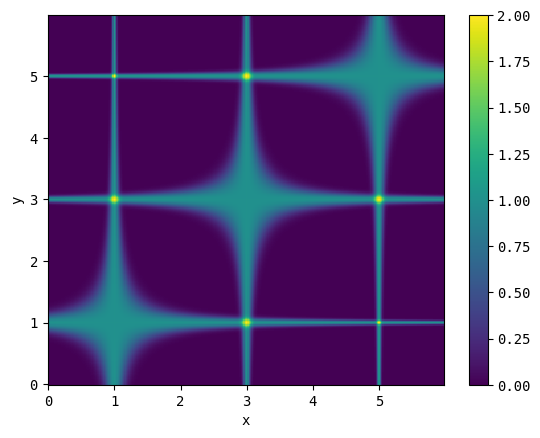

In [42]:
n_dims = 2
n_peaks = 3

boundaries = [
    [0, 6],
    [0, 6]
]

x = tnp.arange(boundaries[0][0], boundaries[0][1], 0.02)
y = tnp.arange(boundaries[1][0], boundaries[1][1], 0.02)
args = tnp.array(np.meshgrid(x, y)).reshape(n_dims, len(x)*len(y))
z = integrand_2d(args)

plt.pcolormesh(x, y, z.reshape(len(x), len(y)))
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

In [43]:
bins_per_dim = 30
instance = BinnedImportanceSamplingIntegrator(bins_per_dim, integrand_2d, n_dims, boundaries)

C:\DevRepositories\MEM_HEP\analysis\mc\BinnedImportanceSamplingIntegrator.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.bin_bounds = tnp.array(tnp.array(bin_bounds))


tensor(2.8119) tensor(5.0000)


(array([0.16710741, 0.16795743, 0.16485728, 0.16730744, 0.16200716,
        0.16330726, 0.16085715, 0.16515725, 0.16965754, 0.16570737,
        0.16760735, 0.17055769, 0.16670731, 0.16920742, 0.17380783,
        0.16325716, 0.17200755, 0.16505744, 0.16575727, 0.16710733,
        0.16775736, 0.16630769, 0.16830738, 0.16805737, 0.16540726,
        0.16440721, 0.16465722, 0.16820778, 0.16550726, 0.16660731]),
 array([5.30958168e-05, 2.00044230e-01, 4.00035381e-01, 6.00026548e-01,
        8.00017655e-01, 1.00000882e+00, 1.19999993e+00, 1.39999104e+00,
        1.59998226e+00, 1.79997337e+00, 1.99996448e+00, 2.19995570e+00,
        2.39994669e+00, 2.59993792e+00, 2.79992914e+00, 2.99992013e+00,
        3.19991136e+00, 3.39990258e+00, 3.59989357e+00, 3.79988480e+00,
        3.99987602e+00, 4.19986725e+00, 4.39985800e+00, 4.59984922e+00,
        4.79984045e+00, 4.99983168e+00, 5.19982290e+00, 5.39981413e+00,
        5.59980488e+00, 5.79979610e+00, 5.99978733e+00]),
 <BarContainer object of 30 

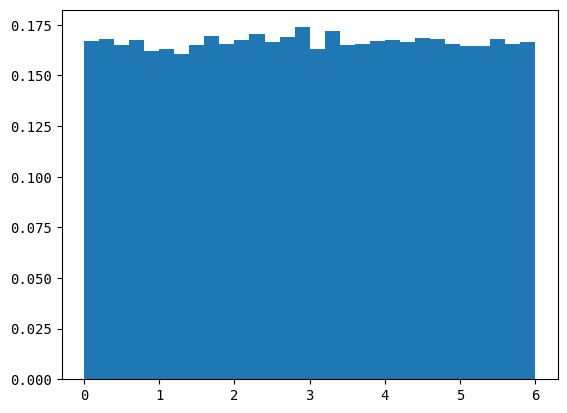

In [44]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())
n_tries = 1000

res_raw = []
for i in range(n_tries):
    res_raw.append(instance.integrate(100))

if tnp_mode():
    res_raw = torch.stack(res_raw).numpy()

n_samples = 100000
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

#plt.hist(res_raw, bins=32)
#plt.title(rf"$I={np.average(res_raw):0.2f}\pm{np.std(res_raw):0.2f}$")

In [19]:
instance.adapt()

tensor(2.8117) tensor(17.0855)


(array([0.05870211, 0.05960215, 0.07200258, 0.11945431, 0.47656721,
        0.46536681, 0.13125466, 0.09365338, 0.07230261, 0.06425228,
        0.06640244, 0.08345296, 0.08575305, 0.12870473, 0.51981847,
        0.5256693 , 0.13980497, 0.07820278, 0.07815287, 0.07145254,
        0.07280267, 0.07635262, 0.08330306, 0.13385491, 0.46246698,
        0.47566633, 0.12205448, 0.06615243, 0.05710196, 0.0598522 ]),
 array([1.85857425e-04, 2.00178668e-01, 4.00171459e-01, 6.00164294e-01,
        8.00157070e-01, 1.00014985e+00, 1.20014262e+00, 1.40013552e+00,
        1.60012829e+00, 1.80012107e+00, 2.00011396e+00, 2.20010662e+00,
        2.40009952e+00, 2.60009241e+00, 2.80008507e+00, 3.00007796e+00,
        3.20007062e+00, 3.40006351e+00, 3.60005641e+00, 3.80004907e+00,
        4.00004196e+00, 4.20003462e+00, 4.40002775e+00, 4.60002041e+00,
        4.80001307e+00, 5.00000572e+00, 5.19999886e+00, 5.39999151e+00,
        5.59998417e+00, 5.79997730e+00, 5.99996996e+00]),
 <BarContainer object of 30 

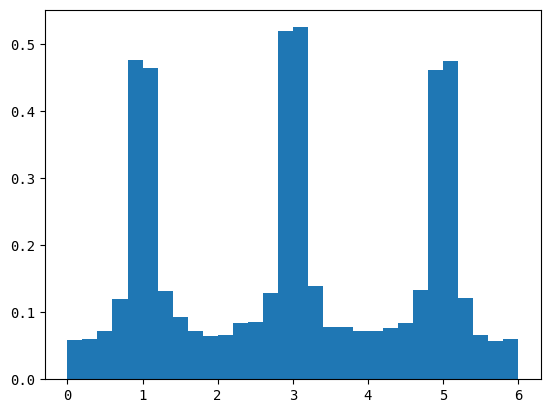

In [20]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())

res_final = []
for i in range(n_tries):
    res_final.append(instance.integrate(100))

if tnp_mode():
    res_final = torch.stack(res_final).numpy()

n_samples = 100000
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

#plt.hist(res_raw, bins=32)
#plt.title(rf"$I={np.average(res_raw):0.2f}\pm{np.std(res_raw):0.2f}$")

Ratio of σ: 1.81 Ratio of μ: 1.00


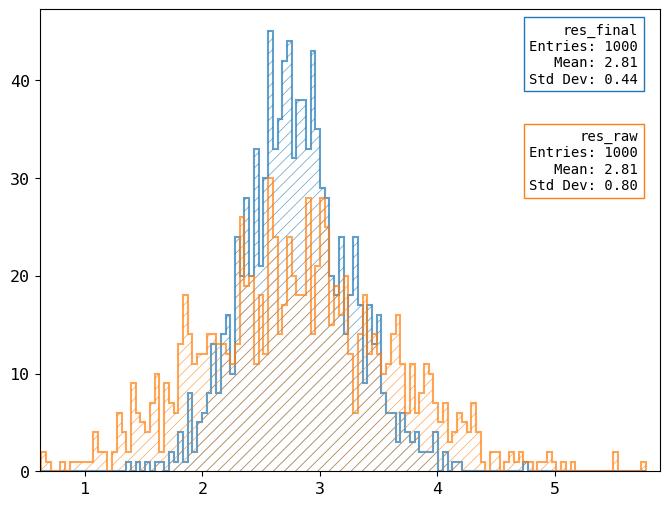

In [21]:
print(f"Ratio of σ: {np.std(res_raw)/np.std(res_final):0.2f}",
      f"Ratio of μ: {np.average(res_raw)/np.average(res_final):0.2f}")

plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

# 3D example

In [35]:
tnp_mode(1);

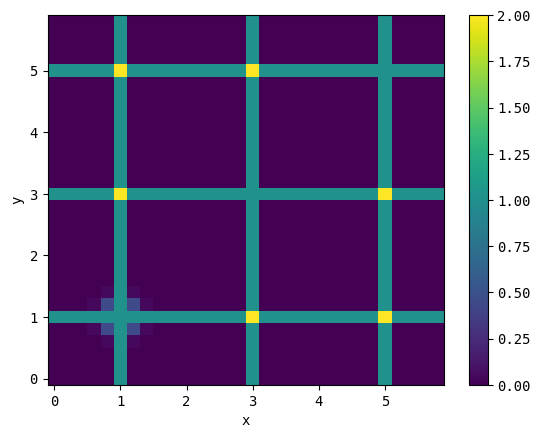

In [36]:
n_dims = 3
n_peaks = 3

peaks_3d = create_peaks(1, 5, n_dims, n_peaks)
integrand_3d = lambda args: integrand_n(args, peaks_3d, a=-500)

boundaries = [
    [0, 6],
    [0, 6],
    [0, 6]
]

x = tnp.arange(boundaries[0][0], boundaries[0][1], 0.2)
y = tnp.arange(boundaries[1][0], boundaries[1][1], 0.2)
z = tnp.arange(boundaries[2][0], boundaries[2][1], 0.2)
#print(tnp.array(np.meshgrid(x, y, z)).shape, len(x))
args = tnp.array(np.meshgrid(x, y, z)).reshape(n_dims, len(x)*len(y)*len(z))
res = integrand_3d(args)

# Show 2d slice
plt.pcolormesh(x, y, res.reshape(len(x), len(y), len(z))[:, :, 0])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

[[[0.  0.2]
  [0.2 0.4]
  [0.4 0.6]
  [0.6 0.8]
  [0.8 1. ]
  [1.  1.2]
  [1.2 1.4]
  [1.4 1.6]
  [1.6 1.8]
  [1.8 2. ]
  [2.  2.2]
  [2.2 2.4]
  [2.4 2.6]
  [2.6 2.8]
  [2.8 3. ]
  [3.  3.2]
  [3.2 3.4]
  [3.4 3.6]
  [3.6 3.8]
  [3.8 4. ]
  [4.  4.2]
  [4.2 4.4]
  [4.4 4.6]
  [4.6 4.8]
  [4.8 5. ]
  [5.  5.2]
  [5.2 5.4]
  [5.4 5.6]
  [5.6 5.8]
  [5.8 6. ]]

 [[0.  0.2]
  [0.2 0.4]
  [0.4 0.6]
  [0.6 0.8]
  [0.8 1. ]
  [1.  1.2]
  [1.2 1.4]
  [1.4 1.6]
  [1.6 1.8]
  [1.8 2. ]
  [2.  2.2]
  [2.2 2.4]
  [2.4 2.6]
  [2.6 2.8]
  [2.8 3. ]
  [3.  3.2]
  [3.2 3.4]
  [3.4 3.6]
  [3.6 3.8]
  [3.8 4. ]
  [4.  4.2]
  [4.2 4.4]
  [4.4 4.6]
  [4.6 4.8]
  [4.8 5. ]
  [5.  5.2]
  [5.2 5.4]
  [5.4 5.6]
  [5.6 5.8]
  [5.8 6. ]]

 [[0.  0.2]
  [0.2 0.4]
  [0.4 0.6]
  [0.6 0.8]
  [0.8 1. ]
  [1.  1.2]
  [1.2 1.4]
  [1.4 1.6]
  [1.6 1.8]
  [1.8 2. ]
  [2.  2.2]
  [2.2 2.4]
  [2.4 2.6]
  [2.6 2.8]
  [2.8 3. ]
  [3.  3.2]
  [3.2 3.4]
  [3.4 3.6]
  [3.6 3.8]
  [3.8 4. ]
  [4.  4.2]
  [4.2 4.4]
  [4.4 4.6]


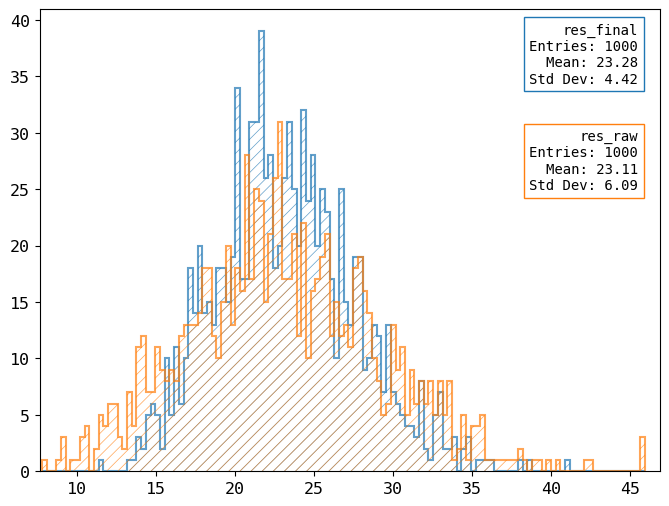

In [37]:
n_samples = 100000
bins_per_dim = 30

instance = BinnedImportanceSamplingIntegrator(bins_per_dim, integrand_3d, n_dims, boundaries)

res_raw = []
res_final = []

for i in range(n_tries):
    res_raw.append(instance.integrate(100))

instance.adapt()

for i in range(n_tries):
    res_final.append(instance.integrate(100))

if tnp_mode():
    res_raw = torch.stack(res_raw).numpy()
    res_final = torch.stack(res_final).numpy()
    
print(f"Ratio of σ: {np.std(res_raw)/np.std(res_final):0.3f}",
      f"Ratio of μ: {np.average(res_raw)/np.average(res_final):0.3f}")

plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

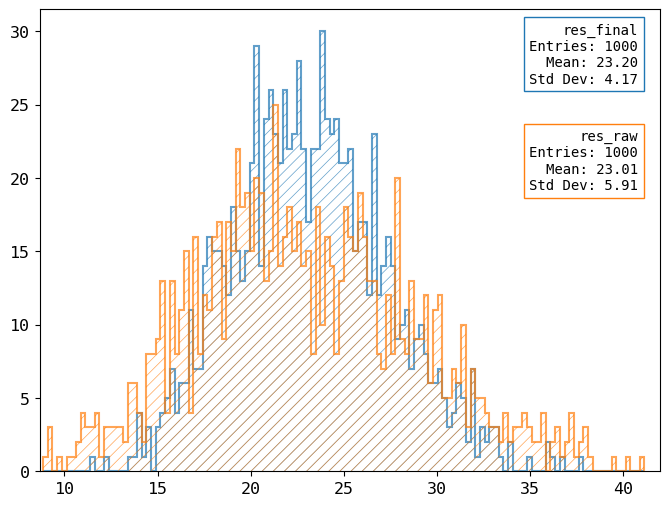

In [156]:
plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

# 10D example

In [40]:
tnp_mode(1);

In [45]:
n_dims = 10
n_peaks = 10

peaks_10d = create_peaks(1, 10, n_dims, n_peaks)
integrand = lambda args: integrand_n(args, peaks_10d, a=-500)

boundaries = [[0, 11] for i in range(n_dims)]

In [46]:
n_tries = 1000
bins_per_dim = 20
instance = BinnedImportanceSamplingIntegrator(bins_per_dim, integrand, n_dims, boundaries)

[[[ 0.    0.55]
  [ 0.55  1.1 ]
  [ 1.1   1.65]
  [ 1.65  2.2 ]
  [ 2.2   2.75]
  [ 2.75  3.3 ]
  [ 3.3   3.85]
  [ 3.85  4.4 ]
  [ 4.4   4.95]
  [ 4.95  5.5 ]
  [ 5.5   6.05]
  [ 6.05  6.6 ]
  [ 6.6   7.15]
  [ 7.15  7.7 ]
  [ 7.7   8.25]
  [ 8.25  8.8 ]
  [ 8.8   9.35]
  [ 9.35  9.9 ]
  [ 9.9  10.45]
  [10.45 11.  ]]

 [[ 0.    0.55]
  [ 0.55  1.1 ]
  [ 1.1   1.65]
  [ 1.65  2.2 ]
  [ 2.2   2.75]
  [ 2.75  3.3 ]
  [ 3.3   3.85]
  [ 3.85  4.4 ]
  [ 4.4   4.95]
  [ 4.95  5.5 ]
  [ 5.5   6.05]
  [ 6.05  6.6 ]
  [ 6.6   7.15]
  [ 7.15  7.7 ]
  [ 7.7   8.25]
  [ 8.25  8.8 ]
  [ 8.8   9.35]
  [ 9.35  9.9 ]
  [ 9.9  10.45]
  [10.45 11.  ]]

 [[ 0.    0.55]
  [ 0.55  1.1 ]
  [ 1.1   1.65]
  [ 1.65  2.2 ]
  [ 2.2   2.75]
  [ 2.75  3.3 ]
  [ 3.3   3.85]
  [ 3.85  4.4 ]
  [ 4.4   4.95]
  [ 4.95  5.5 ]
  [ 5.5   6.05]
  [ 6.05  6.6 ]
  [ 6.6   7.15]
  [ 7.15  7.7 ]
  [ 7.7   8.25]
  [ 8.25  8.8 ]
  [ 8.8   9.35]
  [ 9.35  9.9 ]
  [ 9.9  10.45]
  [10.45 11.  ]]

 [[ 0.    0.55]
  [ 0.55  1.1 ]
  

In [49]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())

res_raw = []
for i in range(n_tries):
    res_raw.append(instance.integrate(100))

if tnp_mode():
    res_raw = torch.stack(res_raw).numpy()

#plt.hist(res_raw, bins=32)
#plt.title(rf"$I={np.average(res_raw):0.2f}\pm{np.std(res_raw):0.2f}$")

tensor(7.0118e+08, dtype=torch.float64) tensor(1.8182, dtype=torch.float64)


(array([0.09193034, 0.09162124, 0.08945753, 0.08962117, 0.09014846,
        0.09183943, 0.09033029, 0.09113031, 0.09129395, 0.08918479,
        0.09153033, 0.09105758, 0.0917667 , 0.09120304, 0.09102122,
        0.09251218, 0.0901121 , 0.09111213, 0.09194852, 0.08942116]),
 array([1.72927976e-04, 5.50154581e-01, 1.10013623e+00, 1.65011789e+00,
        2.20009954e+00, 2.75008119e+00, 3.30006285e+00, 3.85004450e+00,
        4.40002615e+00, 4.95000781e+00, 5.49998946e+00, 6.04997111e+00,
        6.59995277e+00, 7.14993442e+00, 7.69991607e+00, 8.24989773e+00,
        8.79987938e+00, 9.34986103e+00, 9.89984269e+00, 1.04498243e+01,
        1.09998060e+01]),
 <BarContainer object of 20 artists>)

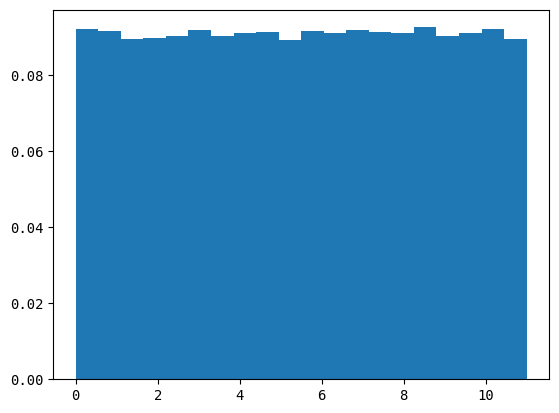

In [50]:
n_samples = 100000
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

In [53]:
instance.adapt()

(array([0.05252796, 0.05620074, 0.06814635, 0.08916481, 0.08085561,
        0.1080196 , 0.09376487, 0.12700167, 0.1165288 , 0.11251057,
        0.10878325, 0.11938339, 0.12203797, 0.09638308, 0.10803778,
        0.07416461, 0.08616477, 0.0754919 , 0.06501904, 0.05801894]),
 array([1.27005412e-04, 5.50119779e-01, 1.10011255e+00, 1.65010533e+00,
        2.20009810e+00, 2.75009087e+00, 3.30008365e+00, 3.85007642e+00,
        4.40006920e+00, 4.95006197e+00, 5.50005474e+00, 6.05004752e+00,
        6.60004029e+00, 7.15003307e+00, 7.70002584e+00, 8.25001861e+00,
        8.80001139e+00, 9.35000416e+00, 9.89999693e+00, 1.04499897e+01,
        1.09999825e+01]),
 <BarContainer object of 20 artists>)

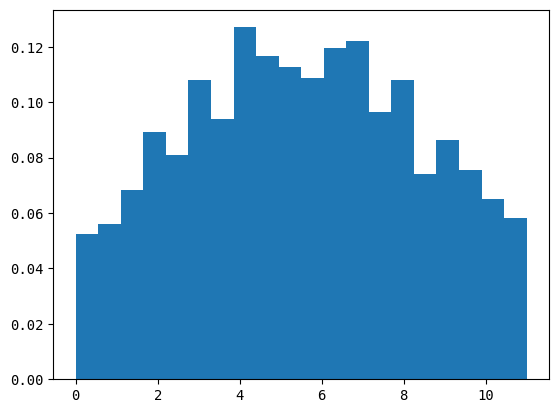

In [52]:
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

In [54]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())

res_final = []
for i in range(n_tries):
    res_final.append(instance.integrate(100))

if tnp_mode():
    res_final = torch.stack(res_final).numpy()

tensor(6.4689e+08, dtype=torch.float64) tensor(2.0777, dtype=torch.float64)


Ratio of σ: 0.512 Ratio of μ: 1.030


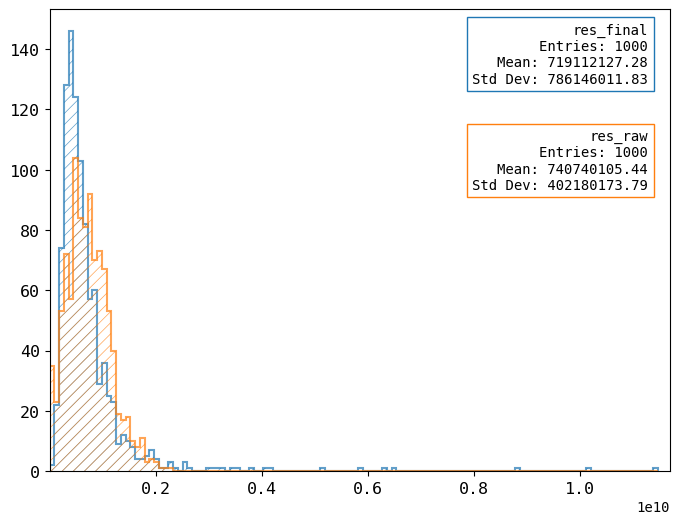

In [55]:
print(f"Ratio of σ: {np.std(res_raw)/np.std(res_final):0.3f}",
      f"Ratio of μ: {np.average(res_raw)/np.average(res_final):0.3f}")

plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

Ratio of σ: 0.647 Ratio of μ: 1.044


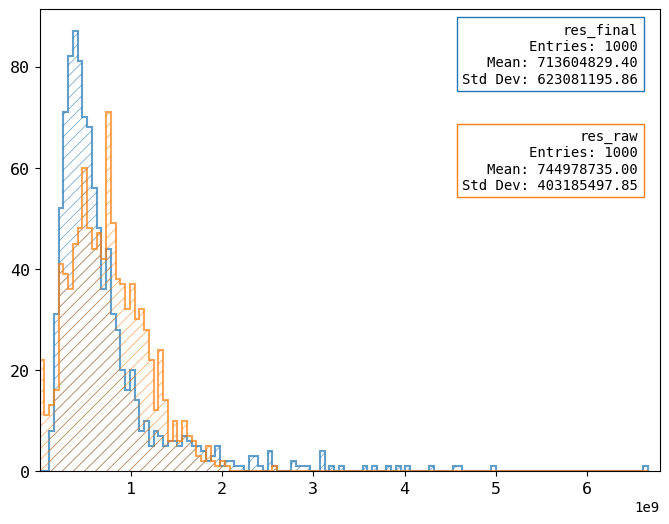

In [195]:
print(f"Ratio of σ: {np.std(res_raw)/np.std(res_final):0.3f}",
      f"Ratio of μ: {np.average(res_raw)/np.average(res_final):0.3f}")

plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

# NF example

In [9]:
from analysis.mc import ImportanceSamplingIntegrator

In [10]:
class NFlowImportanceSamplingIntegrator(ImportanceSamplingIntegrator):
    def __init__(self, model, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.model = model
        
    def sample(self, n_samples:int=1, with_importance:bool=False):
        pass
    
    def adapt(self, n_samples:int=1000000):
        self.adapted = True
        pass

In [149]:
# Physics
#from analysis.cffi.mg5.lib import mc_batch, mc_batch_sigma
from analysis.import_data import import_true_reco
from analysis.nis.distributions import HyperUniform
import numpy as np
import pandas as pd

In [287]:
import normflows as nf
import torch
from normflows.distributions import BaseDistribution
from typing import Optional, Callable

def get_nfm(q0:Optional[BaseDistribution]=None,
            K:int = 16,
            latent_size:int = 2,
            hidden_units: int = 128,
            hidden_layers:int = 2,
            cuda_if_available:bool = True,
            flow:Callable = nf.flows.AutoregressiveRationalQuadraticSpline,
            linear_permute:bool = True,
            flow_args:dict = {},
            seed:Optional[int]=None):
    
    if seed is not None:
        torch.manual_seed(seed)

    flows = []
    for i in range(K):
        flows += [flow(latent_size, hidden_layers, hidden_units, **flow_args)]
        if linear_permute:
            flows += [nf.flows.LULinearPermute(latent_size)]

    # Set base distribuiton
    if q0 is None:
        q0 = nf.distributions.DiagGaussian(latent_size, trainable=False)
        
    # Construct flow model
    nfm = nf.NormalizingFlow(q0=q0, flows=flows)

    print("Using device " + f"GPU ({torch.cuda.get_device_name(0)})" if torch.cuda.is_available() else "CPU")
        
    # Move model on GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() and cuda_if_available else 'cpu')
    return nfm.to(device)

In [288]:
class HyperUniform(BaseDistribution):
    """
    Multivariate uniform distribution
    """

    def __init__(self, low, high, dtype=torch.float, device:Optional[str]=None):
        """Constructor

        Args:
          low: Lower bound of uniform distribution
          high: Upper bound of uniform distribution
        """
        
        low = torch.tensor(low).to(dtype)
        high = torch.tensor(high).to(dtype)
        
        if device is not None:
            low = low.to(device)
            high = high.to(device)
        
        assert(low.shape == high.shape)
        
        shape = low.shape[0]
        
        super().__init__()
        if isinstance(shape, int):
            shape = (shape,)
        if isinstance(shape, list):
            shape = tuple(shape)
            
        self.shape = shape
        self.d = np.prod(shape)
        self.low = low
        self.high = high
        self.log_prob_val = -torch.sum(torch.log(self.high - self.low))

    def forward(self, num_samples=1, context=None):
        eps = torch.rand(
            (num_samples,) + self.shape, dtype=self.low.dtype, device=self.low.device
        )
        z = self.low + (self.high - self.low) * eps
        log_p = self.log_prob_val * torch.ones(num_samples, device=self.low.device)
        return z, log_p

    def log_prob(self, z, context=None):
        return torch.ones(z.shape[0], device=z.device)
        log_p = self.log_prob_val * torch.ones(z.shape[0], device=z.device)
        out_range = torch.logical_or(z < self.low, z > self.high)
        ind_inf = torch.any(torch.reshape(out_range, (z.shape[0], -1)), dim=-1)
        log_p[ind_inf] = -np.inf
        return log_p

In [320]:
from typing import Iterable
import matplotlib
from matplotlib import pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

def_boundaries = [
    [-2.5, 2.5],
    [-2.5, 2.5]
]

def nfm_new(device=device, boundaries:Optional[Iterable]=None):    
    if boundaries is None:
        boundaries = def_boundaries
        
    low = np.array(boundaries).T[0].tolist()
    high = np.array(boundaries).T[1].tolist()
    
    q0 = HyperUniform(low, high, device=device)
    return get_nfm(q0, K=16, flow_args={ 'num_bins': 8 })#, flow=nf.flows.CoupledRationalQuadraticSpline, linear_permute=True)

def nfm_plot(nfm, target:Optional[Callable]=None, boundaries:Optional[Iterable]=None,
             log_scale:bool=False):
    # Probabilities along fixed grid
    if boundaries is None:
        boundaries = def_boundaries
        
    low = np.array(boundaries).T[0].tolist()
    high = np.array(boundaries).T[1].tolist()
    
    if len(low) != 2 or len(low) != len(high):
        raise Exception("Invalid size")
    
    grid_size = 50
    xx, yy = torch.meshgrid(
        torch.linspace(low[0], high[0], grid_size),
        torch.linspace(low[1], high[1], grid_size))
    
    res = None
    if isinstance(target, Callable):
        res = target(tnp.stack([
            xx.flatten(),
            yy.flatten()
        ])).reshape((grid_size, grid_size))
    else:
        zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
        zz = zz.to(device)

        nfm.eval()
        log_prob = nfm.log_prob(zz).to('cpu').view(*xx.shape)
        nfm.train()
        prob = torch.exp(log_prob)
        prob[torch.isnan(prob)] = 0
        
        res = prob
        
    fig = plt.figure(figsize=(6, 6))
    pc = plt.pcolormesh(xx, yy, res.data.numpy(), norm=matplotlib.colors.LogNorm() if log_scale else None)
    plt.gca().set_aspect('equal', 'box')
    fig.colorbar(pc)
    plt.show()

Using device GPU (NVIDIA GeForce GTX 1080 Ti)


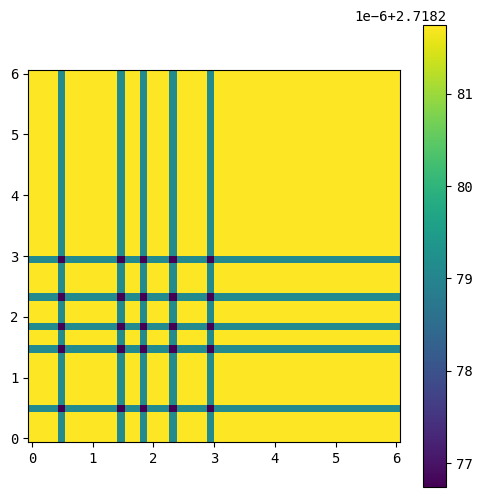

In [326]:
nfm = nfm_new(boundaries=boundaries)
nfm_plot(nfm, boundaries=boundaries)

In [ ]:
import torch
import numpy as np
from sklearn.datasets import make_moons
from tqdm import tqdm

(array([[21., 25., 25., ..., 20., 27., 26.],
        [24., 22., 19., ..., 18., 20., 26.],
        [29., 17., 23., ..., 27., 28., 26.],
        ...,
        [24., 25., 28., ..., 26., 27., 14.],
        [26., 20., 24., ..., 30., 20., 23.],
        [19., 30., 22., ..., 20., 33., 21.]]),
 array([-1.99999070e+00, -1.93749137e+00, -1.87499204e+00, -1.81249270e+00,
        -1.74999337e+00, -1.68749404e+00, -1.62499470e+00, -1.56249537e+00,
        -1.49999604e+00, -1.43749670e+00, -1.37499737e+00, -1.31249804e+00,
        -1.24999870e+00, -1.18749937e+00, -1.12500004e+00, -1.06250070e+00,
        -1.00000137e+00, -9.37502038e-01, -8.75002705e-01, -8.12503371e-01,
        -7.50004038e-01, -6.87504705e-01, -6.25005372e-01, -5.62506039e-01,
        -5.00006706e-01, -4.37507372e-01, -3.75008039e-01, -3.12508706e-01,
        -2.50009373e-01, -1.87510040e-01, -1.25010706e-01, -6.25113733e-02,
        -1.20401382e-05,  6.24872930e-02,  1.24986626e-01,  1.87485959e-01,
         2.49985293e-01,  3.124

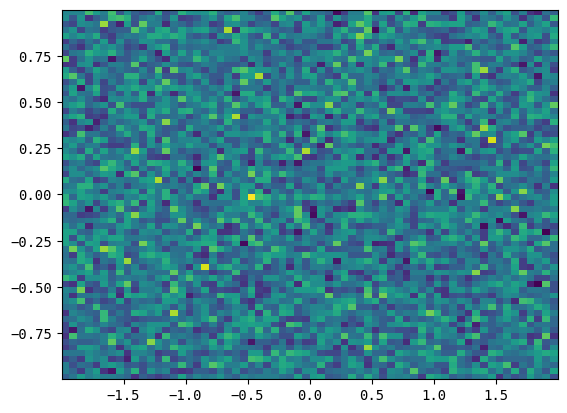

In [318]:
a = HyperUniform(low=[-2,-1], high=[2, 1])

z = a.sample(100000)

pX = z.T[0].detach().cpu().numpy()
pY = z.T[1].detach().cpu().numpy()

plt.hist2d(pX, pY, bins=(64,64))

In [53]:
np.log(dist.high - dist.low)

tensor([0., 0.])

 19%|█▉        | 19/100 [00:04<00:20,  3.88it/s]

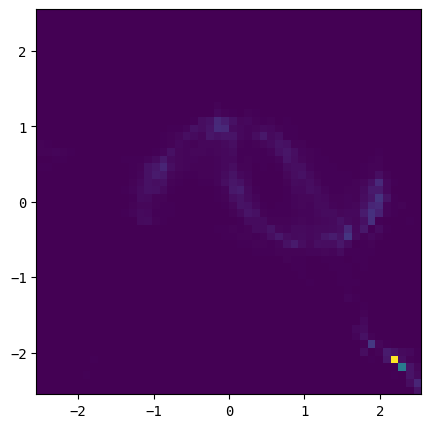

 39%|███▉      | 39/100 [00:09<00:15,  4.00it/s]

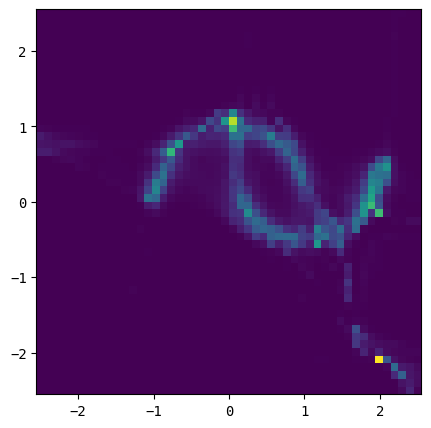

 59%|█████▉    | 59/100 [00:15<00:10,  4.08it/s]

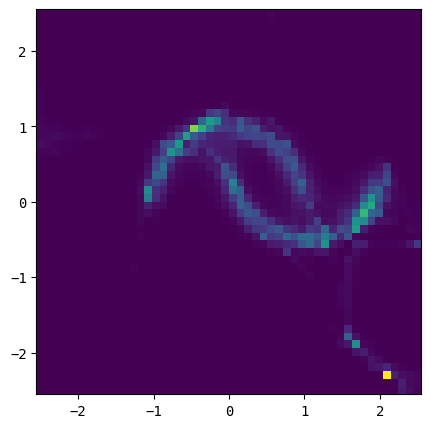

 79%|███████▉  | 79/100 [00:20<00:05,  4.00it/s]

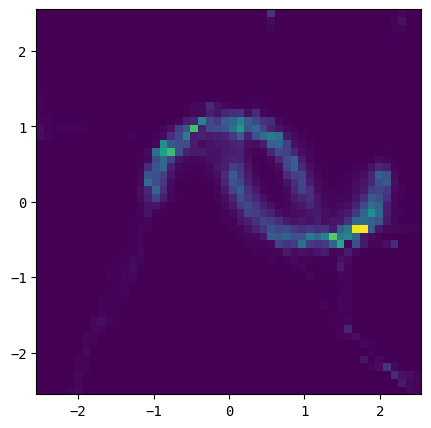

 99%|█████████▉| 99/100 [00:25<00:00,  3.85it/s]

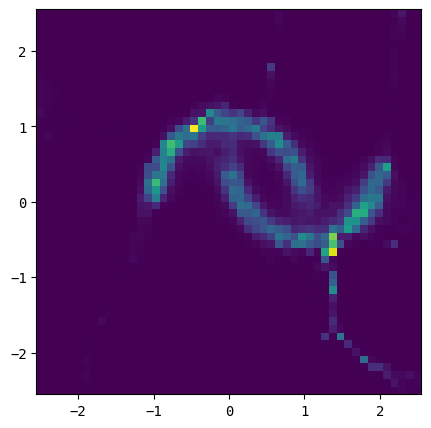

In [300]:
dist.log_prob_val

100%|██████████| 100/100 [00:26<00:00,  3.83it/s]


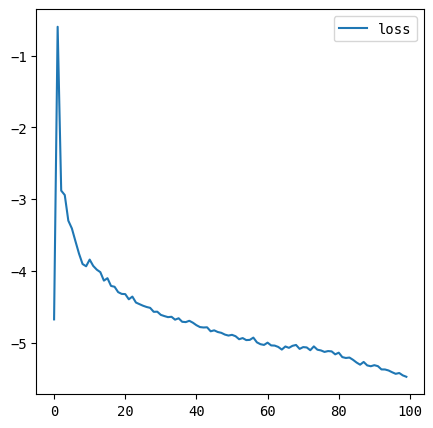

In [9]:
max_iter = 100
num_samples = 2 ** 13
show_iter = 20

loss_hist = np.array([])

optimizer = torch.optim.Adam(nfm.parameters(), lr=1e-3, weight_decay=1e-5)
for it in tqdm(range(max_iter)):
    optimizer.zero_grad()
    
    # Get training samples
    x_np, _ = make_moons(num_samples, noise=0.1)
    x = torch.tensor(x_np).float().to(device)
    
    # Compute loss
    loss = nfm.forward_kld(x)
    
    # Do backprop and optimizer step
    if ~(torch.isnan(loss) | torch.isinf(loss)):
        loss.backward()
        optimizer.step()
    
    # Log loss
    loss_hist = np.append(loss_hist, loss.to('cpu').data.numpy())
    
    latent_size = len(boundaries)

    flows = []
    for i in range(K):
        flows += [nf.flows.AutoregressiveRationalQuadraticSpline(latent_size, hidden_layers, hidden_units)]
        flows += [nf.flows.LULinearPermute(latent_size)]

    # Set base distribuiton
    if q0 is None:
        #q0 = Uniform_dist(latent_size, low=boundaries.T[0], high=boundaries.T[1])
        q0 = nf.distributions.DiagGaussian(latent_size, trainable=False)
        #q0 = nf.distributions.GaussianMixture(latent_size, latent_size, np.average(boundaries, axis=1).tolist(), trainable=False)
        #q0 = nf.distributions.GaussianMixture(latent_size, latent_size, [3, 3], trainable=False) 
    
    # Construct flow model
    nfm = nf.NormalizingFlow(q0=q0, flows=flows)

    # Move model on GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() and consider_gpu else 'cpu')
    nfm = nfm.to(device)
    
    return nfm

In [27]:
nfm = init_nfm([0, 6])

In [28]:
nfm.sample(10)

RuntimeError: "check_uniform_bounds" not implemented for 'Int'

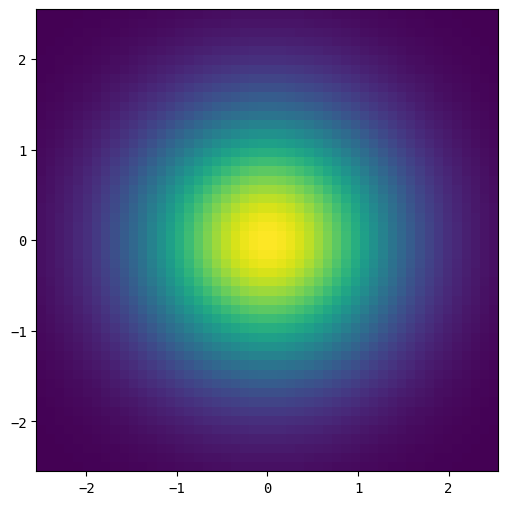

In [201]:
import torch
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from tqdm import tqdm

# Probabilities along fixed grid
grid_size = 50
xx, yy = torch.meshgrid(torch.linspace(-2.5, 2.5, grid_size), torch.linspace(-2.5, 2.5, grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
zz = zz.to(device)

nfm.eval()
log_prob = nfm.log_prob(zz).to('cpu').view(*xx.shape)
nfm.train()
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

plt.figure(figsize=(6, 6))
plt.pcolormesh(xx, yy, prob.data.numpy())
plt.gca().set_aspect('equal', 'box')
plt.show()

In [199]:
xx.shape, yy.shape, prob.data.shape

(torch.Size([50, 50]), torch.Size([50, 50]), torch.Size([50, 50]))

# Test on integrand

In [338]:
nfm = nfm_new(boundaries=boundaries)
nfm_plot(nfm, boundaries=boundaries, target=integrand_2d)
nfm_plot(nfm, boundaries=boundaries)

Using device GPU (NVIDIA GeForce GTX 1080 Ti)


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [330]:
grid_size = 50
low = np.array(boundaries).T[0].tolist()
high = np.array(boundaries).T[1].tolist()
    
xx, yy = torch.meshgrid(
    torch.linspace(low[0], high[0], grid_size),
    torch.linspace(low[1], high[1], grid_size))

xx = xx.to(device)
yy = yy.to(device)

In [332]:
peaks_2d = create_peaks(1, 5, n_dims, n_peaks).to(device)
integrand_2d = lambda args: integrand_n(args, peaks_2d, a=-500)

In [333]:
max_iter = 50
num_samples = 2 ** 9
show_iter = 10

loss_hist = np.array([])

optimizer = torch.optim.Adam(nfm.parameters(), lr=1e-3, weight_decay=1e-5)
for it in tqdm(range(max_iter)):
    optimizer.zero_grad()
    
    # Get training samples
    samples, probabilities = nfm.sample(num_samples)
    evaluations = integrand_2d(samples.T)
    #x_np, _ = make_moons(num_samples, noise=0.1)
    #x = torch.tensor(x_np).float().to(device)
    probabilities = torch.exp(probabilities).to(device)
    
    # Compute loss
    #arg_sum = (evaluations.detach() / probabilities)**2
    arg_sum = torch.abs(evaluations) * probabilities 
    loss = 1/num_samples * torch.sum(arg_sum)
    #loss = nfm.forward_kld(x)
    
    # Do backprop and optimizer step
    if ~(torch.isnan(loss) | torch.isinf(loss)):
        loss.backward()
        optimizer.step()
    
    # Log loss
    loss_hist = np.append(loss_hist, loss.to('cpu').data.numpy())
    
    # Plot learned distribution
    if (it + 1) % show_iter == 0:
        nfm.eval()
        log_prob = nfm.log_prob(zz)
        nfm.train()
        prob = torch.exp(log_prob.to('cpu').view(*xx.shape))
        prob[torch.isnan(prob)] = 0

        plt.figure(figsize=(5, 5))
        plt.pcolormesh(xx, yy, prob.data.numpy())
        plt.gca().set_aspect('equal', 'box')
        plt.show()

# Plot loss
plt.figure(figsize=(5, 5))
plt.plot(loss_hist, label='loss')
plt.legend()
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/analysis/tnp/tnp.py:29: UserWarning: No PYTORCH_KERNEL_CACHE_PATH or HOME environment variable set! This disables kernel caching. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392026823/work/aten/src/ATen/native/cuda/jit_utils.cpp:1426.)
  'prod': lambda tensor, axis=0: torch.prod(tensor, dim=axis),
  0%|          | 0/50 [00:01<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:
Demo

 19%|█▉        | 19/100 [00:04<00:17,  4.65it/s]

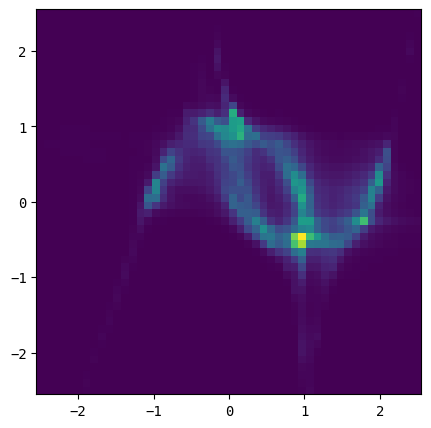

 39%|███▉      | 39/100 [00:09<00:12,  4.90it/s]

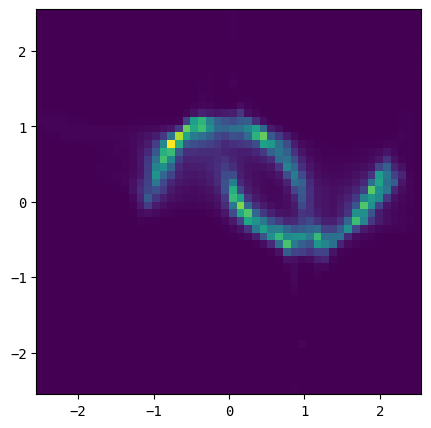

 59%|█████▉    | 59/100 [00:13<00:07,  5.15it/s]

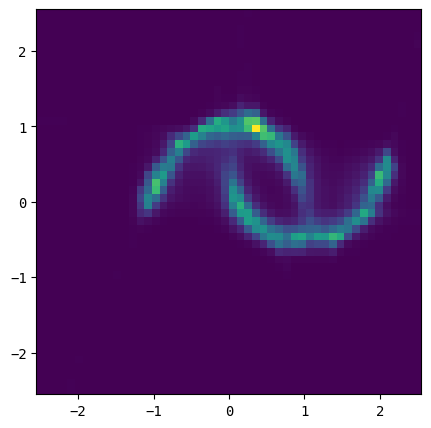

 79%|███████▉  | 79/100 [00:17<00:04,  5.05it/s]

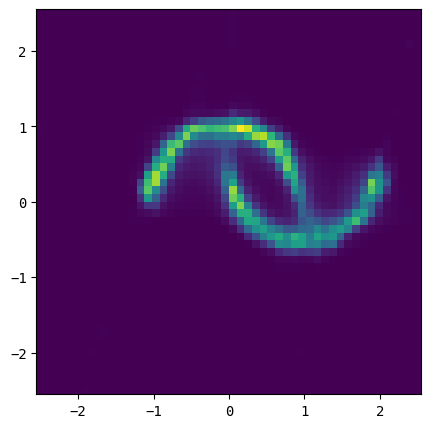

 99%|█████████▉| 99/100 [00:21<00:00,  5.25it/s]

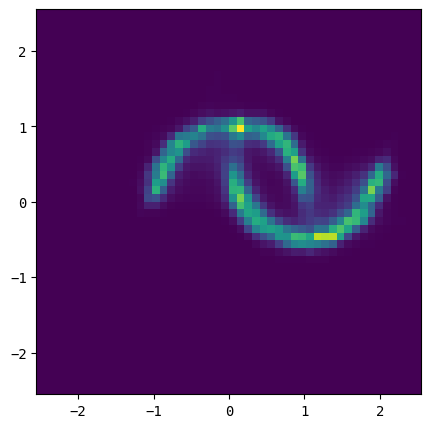

100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


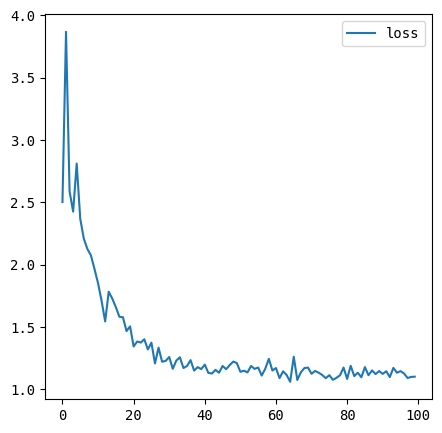

In [8]:
max_iter = 100
num_samples = 2 ** 9
show_iter = 20

loss_hist = np.array([])

optimizer = torch.optim.Adam(nfm.parameters(), lr=1e-3, weight_decay=1e-5)
for it in tqdm(range(max_iter)):
    optimizer.zero_grad()
    
    # Get training samples
    x_np, _ = make_moons(num_samples, noise=0.1)
    x = torch.tensor(x_np).float().to(device)
    
    # Compute loss
    loss = nfm.forward_kld(x)
    
    # Do backprop and optimizer step
    if ~(torch.isnan(loss) | torch.isinf(loss)):
        loss.backward()
        optimizer.step()
    
    # Log loss
    loss_hist = np.append(loss_hist, loss.to('cpu').data.numpy())
    
    # Plot learned distribution
    if (it + 1) % show_iter == 0:
        nfm.eval()
        log_prob = nfm.log_prob(zz)
        nfm.train()
        prob = torch.exp(log_prob.to('cpu').view(*xx.shape))
        prob[torch.isnan(prob)] = 0

        plt.figure(figsize=(5, 5))
        plt.pcolormesh(xx, yy, prob.data.numpy())
        plt.gca().set_aspect('equal', 'box')
        plt.show()

# Plot loss
plt.figure(figsize=(5, 5))
plt.plot(loss_hist, label='loss')
plt.legend()
plt.show()

nfm = get_nfm()

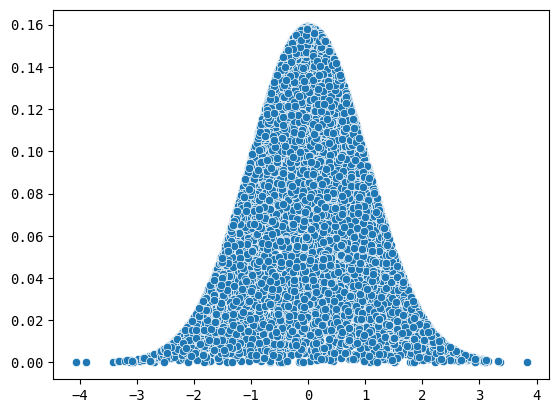

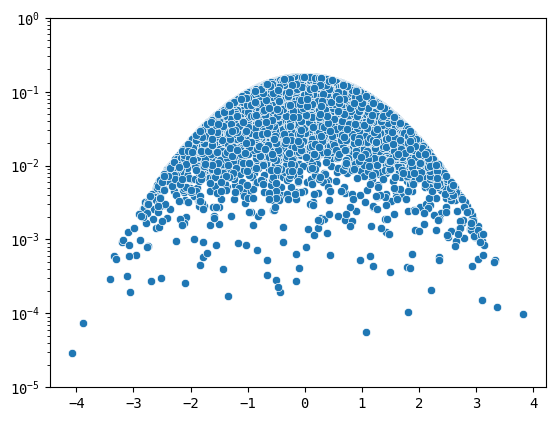

In [225]:
num_samples = 10000
samples, probabilities_raw = nfm.sample(num_samples)
evaluations = integrand_2d(samples.T)
#x_np, _ = make_moons(num_samples, noise=0.1)
#x = torch.tensor(x_np).float().to(device)

probabilities = torch.exp(probabilities_raw).to(device)

# Compute loss
arg_sum = evaluations**2 #(evaluations / probabilities)**2

probabilities_raw = probabilities_raw.detach().numpy()
probabilities = probabilities.detach().numpy()
arg_sum = arg_sum.detach().numpy()
samples = samples.detach().numpy()

if isinstance(evaluations, torch.Tensor):
    evaluations = evaluations.detach().numpy()
    
ax = sns.scatterplot(x=samples.T[0], y=probabilities)
if False:
    ax.set_yscale("log")
    ax.set_ylim((1e-5, 1e+0))
plt.show()
    
ax = sns.scatterplot(x=samples.T[0], y=probabilities)
if True:
    ax.set_yscale("log")
    ax.set_ylim((1e-5, 1e+0))

In [226]:
ami = arg_sum.argmax()
print(evaluations[ami], probabilities[ami], arg_sum[ami])

1.0763825 0.0011083361 1.1585994


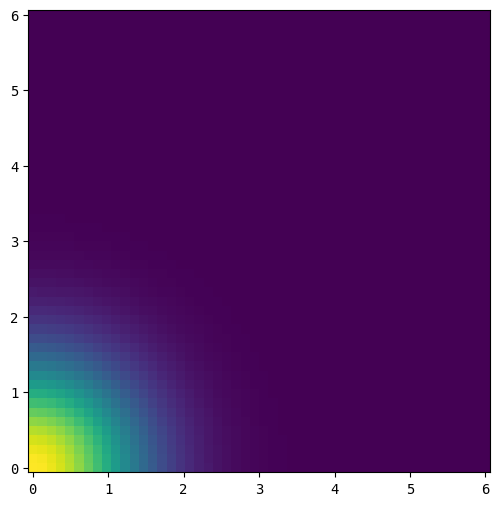

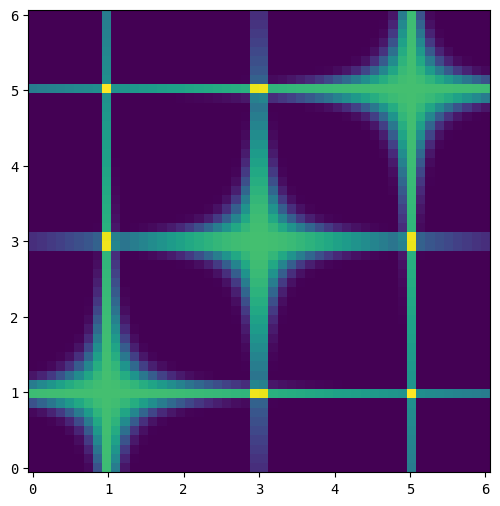

In [223]:
grid_size = 50
xx, yy = torch.meshgrid(torch.linspace(boundaries[0][0], boundaries[0][1], grid_size), torch.linspace(boundaries[1][0], boundaries[1][1], grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
zz = zz.to(device)

nfm.eval()
log_prob = nfm.log_prob(zz).to('cpu').view(*xx.shape)
nfm.train()
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

plt.figure(figsize=(6, 6))
plt.pcolormesh(xx, yy, prob.data.numpy())
plt.gca().set_aspect('equal', 'box')
plt.show()

res = integrand_2d(tnp.stack([
    xx.flatten(),
    yy.flatten()
]))
plt.figure(figsize=(6, 6))
plt.pcolormesh(xx, yy, res.reshape((grid_size, grid_size)).numpy())
plt.gca().set_aspect('equal', 'box')
plt.show()

In [192]:
max_iter = 50
num_samples = 10000
show_iter = 10

loss_hist = np.array([])

optimizer = torch.optim.Adam(nfm.parameters(), lr=1e-3, weight_decay=1e-5)
for it in tqdm(range(max_iter)):
    optimizer.zero_grad()
    
    # Get training samples
    samples, probabilities = nfm.sample(num_samples)
    evaluations = integrand_2d(samples.T)
    #x_np, _ = make_moons(num_samples, noise=0.1)
    #x = torch.tensor(x_np).float().to(device)
    probabilities = torch.exp(probabilities).to(device)
    
    # Compute loss
    #arg_sum = (evaluations.detach() / probabilities)**2
    arg_sum = torch.abs(evaluations) * probabilities 
    loss = 1/num_samples * torch.sum(arg_sum)
    #loss = nfm.forward_kld(x)
    
    # Do backprop and optimizer step
    if ~(torch.isnan(loss) | torch.isinf(loss)):
        loss.backward()
        optimizer.step()
    
    # Log loss
    loss_hist = np.append(loss_hist, loss.to('cpu').data.numpy())
    
    # Plot learned distribution
    if (it + 1) % show_iter == 0:
        nfm.eval()
        log_prob = nfm.log_prob(zz)
        nfm.train()
        prob = torch.exp(log_prob.to('cpu').view(*xx.shape))
        prob[torch.isnan(prob)] = 0

        plt.figure(figsize=(5, 5))
        plt.pcolormesh(xx, yy, prob.data.numpy())
        plt.gca().set_aspect('equal', 'box')
        plt.show()

# Plot loss
plt.figure(figsize=(5, 5))
plt.plot(loss_hist, label='loss')
plt.legend()
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float